In [118]:
%matplotlib inline
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-darkgrid')

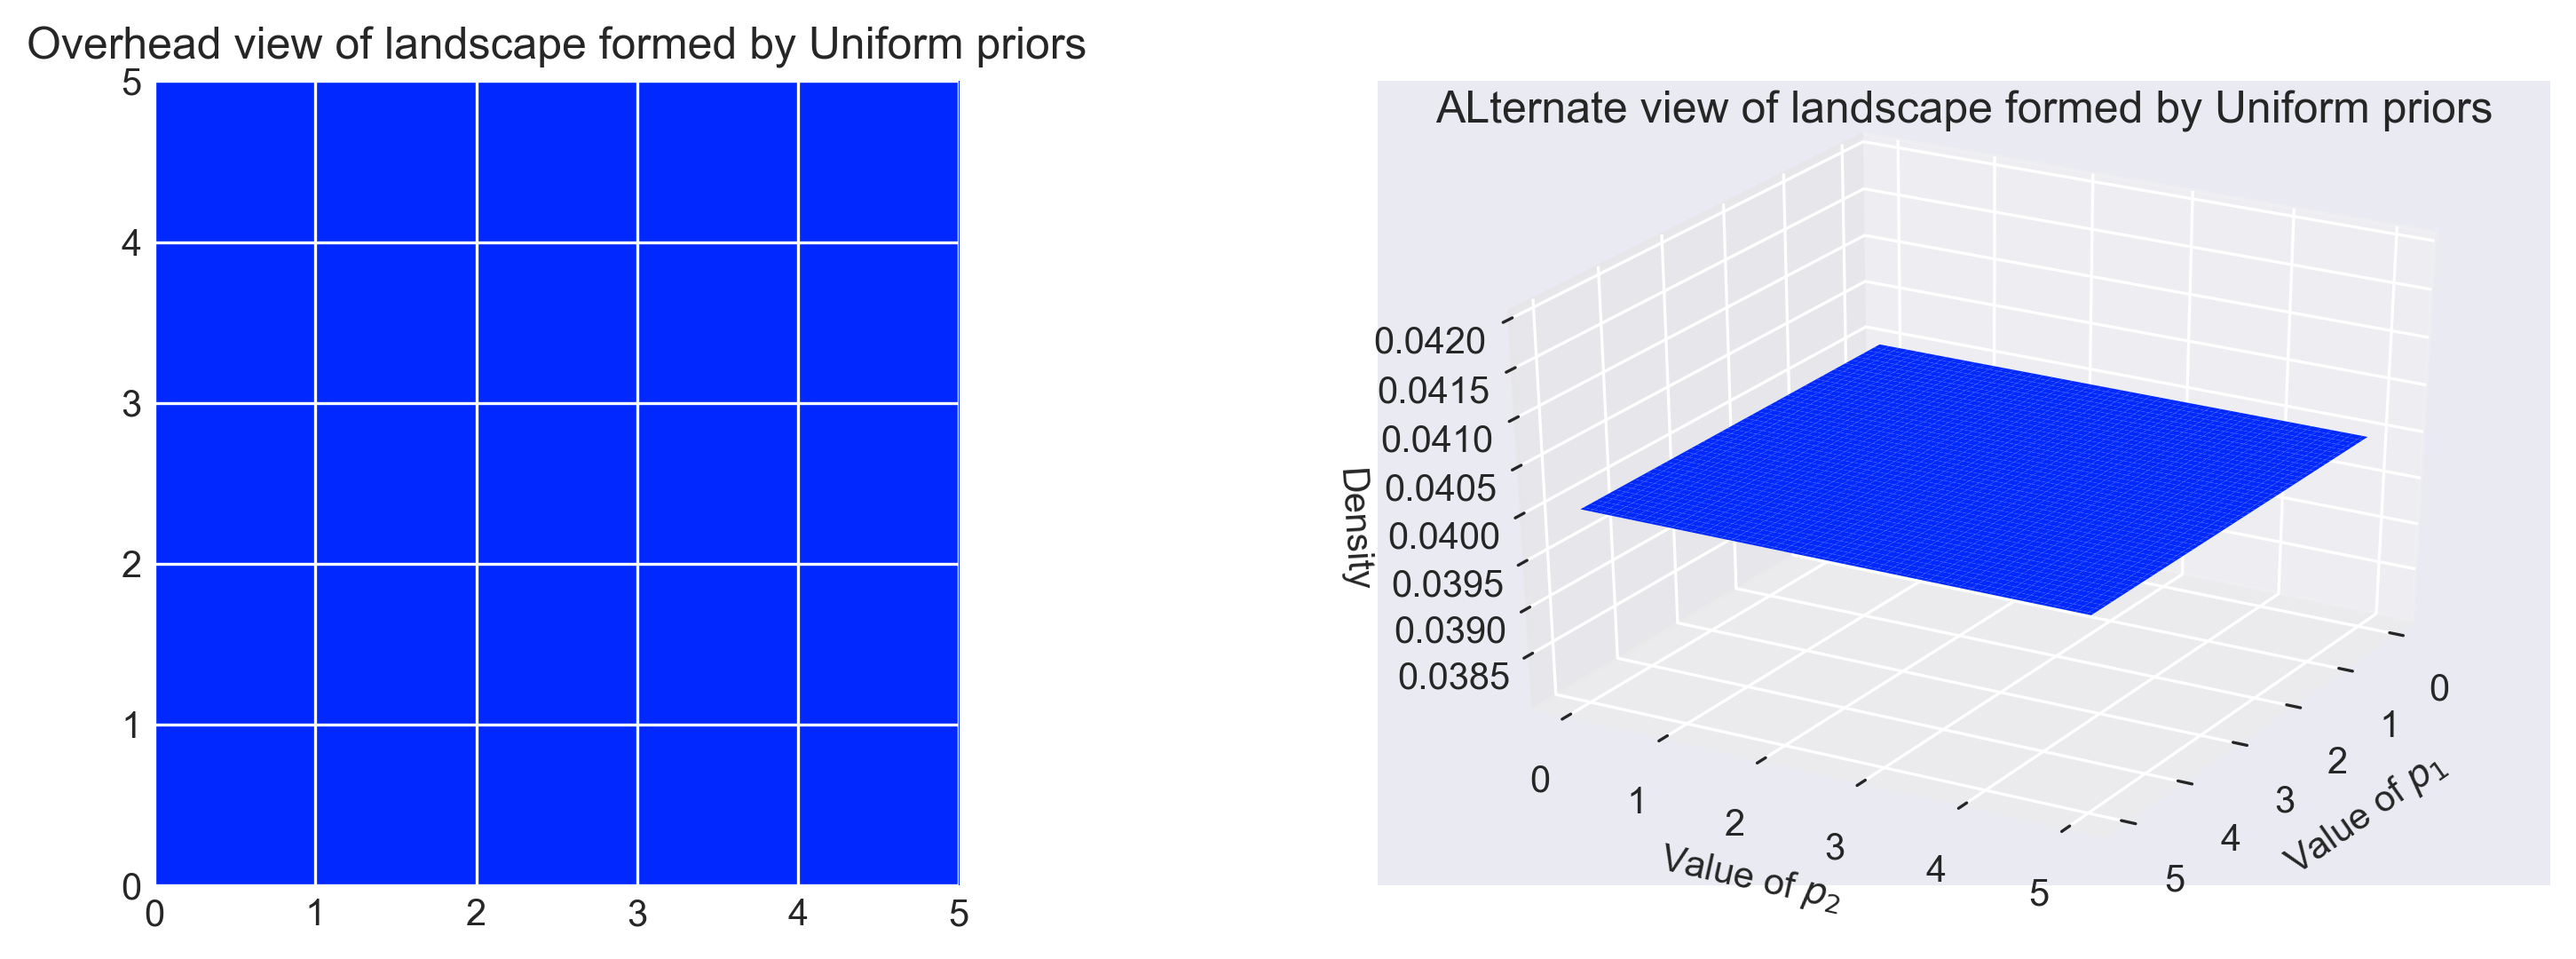

In [119]:
jet = plt.cm.jet
fig = plt.figure()

x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_y[:, None], uni_x[None, :])
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Overhead view of landscape formed by Uniform priors')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$')
ax.set_ylabel('Value of $p_2$')
ax.set_zlabel('Density')
plt.title('ALternate view of landscape formed by Uniform priors')

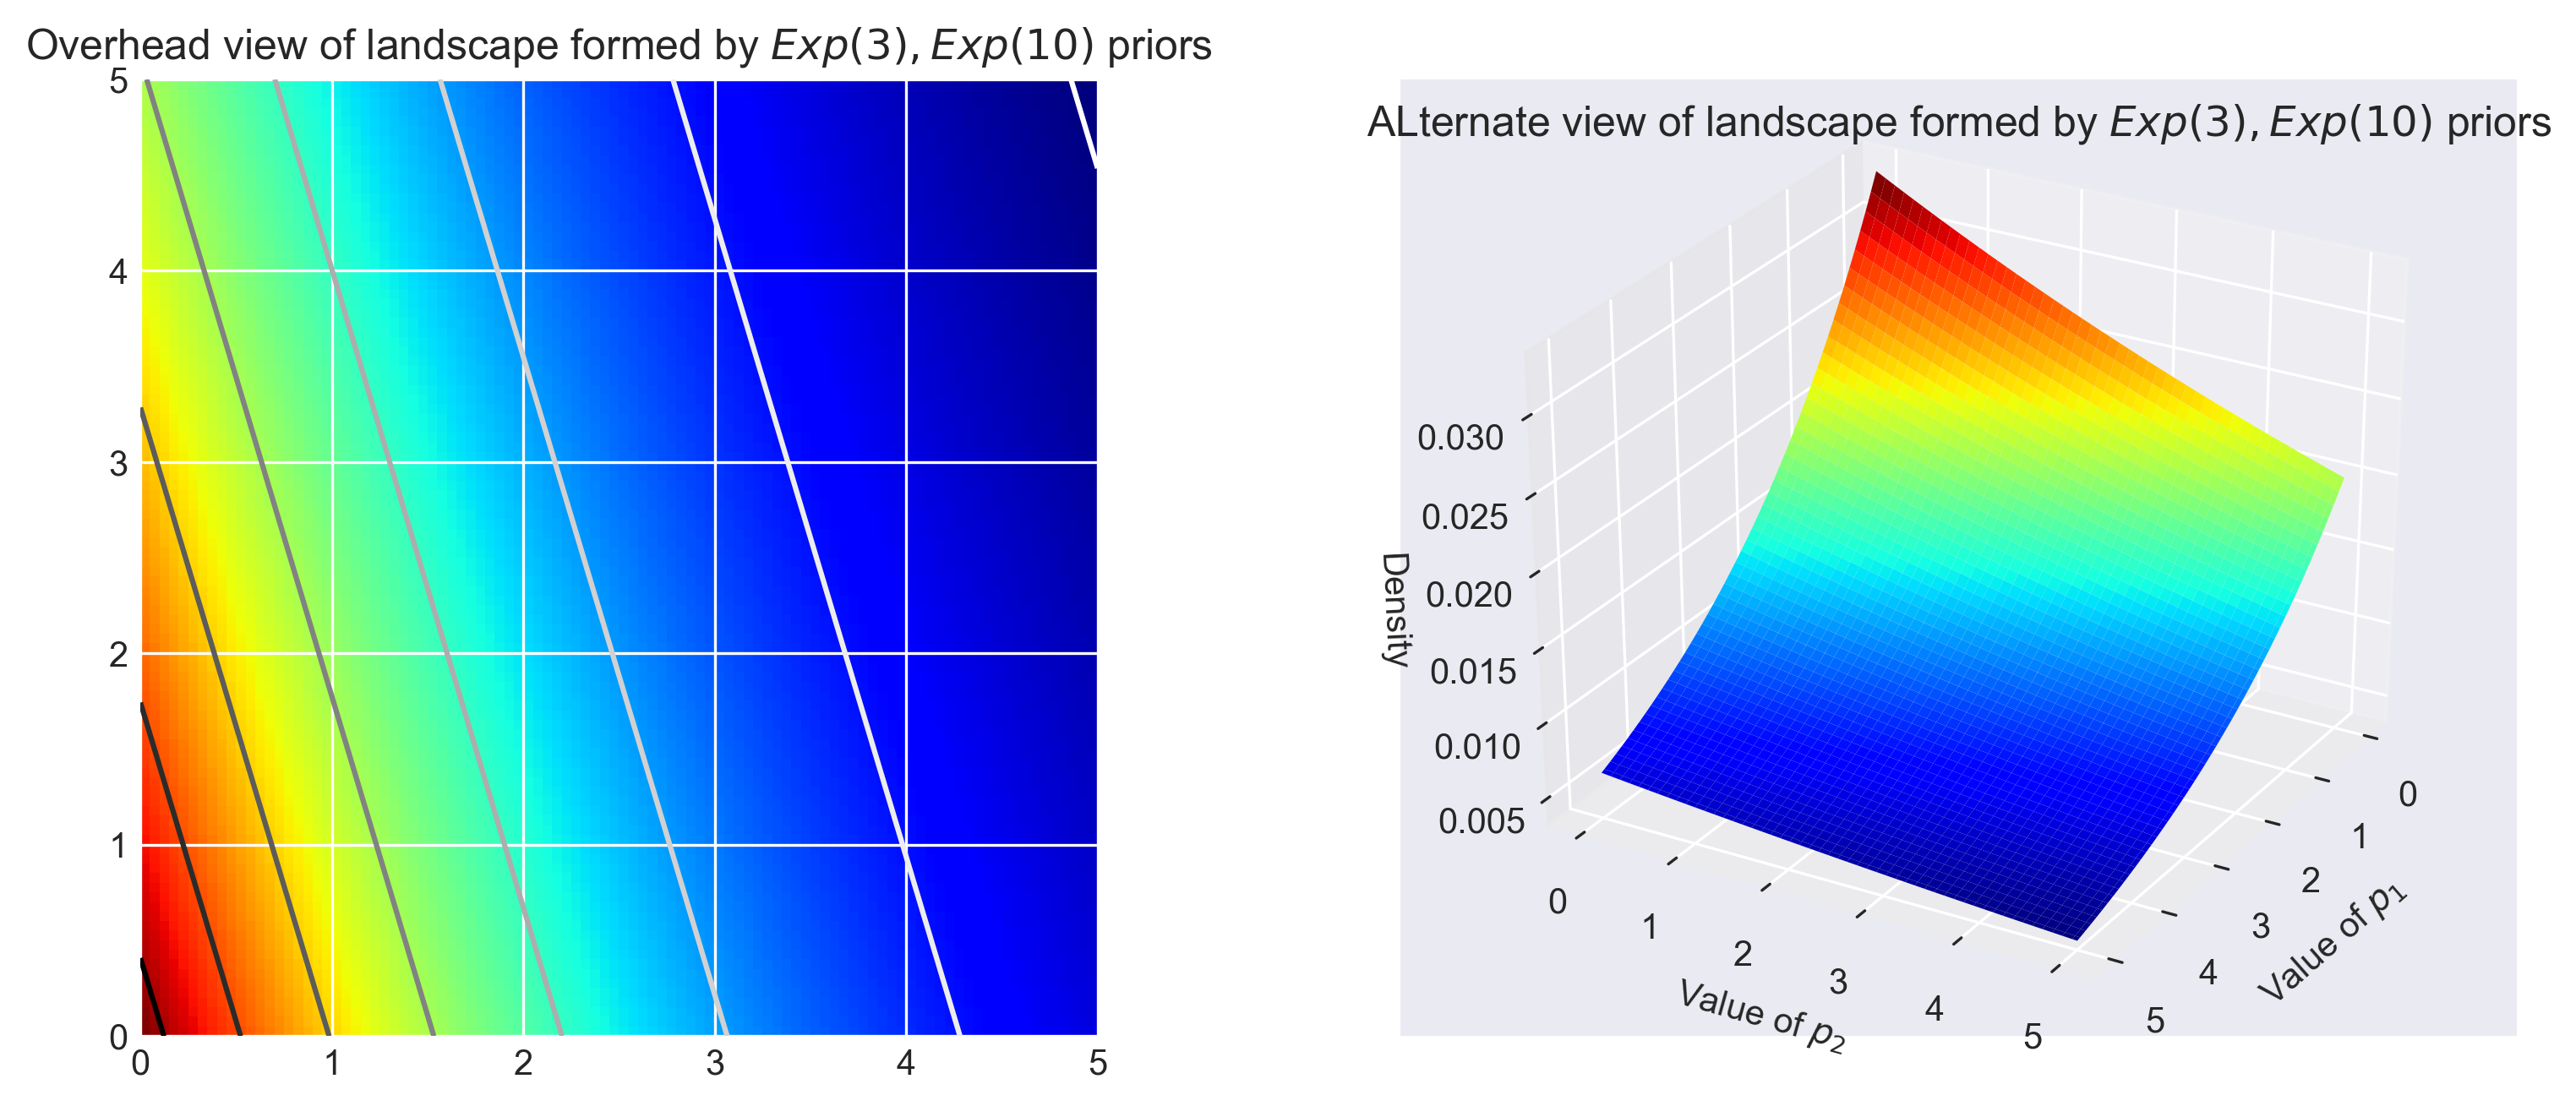

In [120]:
figsize(12.5, 5)
fig = plt.figure()

plt.subplot(121)
exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_y[:, None], exp_x[None, :]) # combination probability
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
plt.title('Overhead view of landscape formed by $Exp(3), Exp(10)$ priors')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$')
ax.set_ylabel('Value of $p_2$')
ax.set_zlabel('Density')
plt.title('ALternate view of landscape formed by $Exp(3), Exp(10)$ priors')

### Inference with different prior distributions

In [121]:
# create observed data

def test(N):

    # sample size
    #N = 100

    # the true parameters
    lambda_1_true = 1
    lambda_2_true = 3

    # generate data
    data = np.concatenate([
        stats.poisson.rvs(lambda_1_true, size=(N, 1)),
        stats.poisson.rvs(lambda_2_true, size=(N, 1))
    ], axis=1)

    #print('observed: {}'.format(data))

    # plot details
    x = y = np.linspace(0.01, 5, 100)
    likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
    likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
    L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

    # likelihood
    #figsize(12.5, 4)
    #plt.plot(x, likelihood_x)
    #plt.plot(y, likelihood_y)

    # uniform priors
    figsize(12.5, 12)

    plt.subplot(221)
    uni_x = stats.uniform.pdf(x, loc=0, scale=5)
    uni_y = stats.uniform.pdf(y, loc=0, scale=5)
    M = np.dot(uni_x[:, None], uni_y[None, :])
    im = plt.imshow(M, interpolation='none', origin='lower', 
                    cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape formed by Uniform priors on $p_1, p_2$.')

    # uniform priors and observed data
    plt.subplot(223)
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower', 
                    cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape wrapped by {} data observation; Uniform priors on $p_1, p_2$.'.format(N))

    # exponential priors
    plt.subplot(222)
    exp_x = stats.expon.pdf(x, loc=0, scale=3)
    exp_y = stats.expon.pdf(y, loc=0, scale=10)
    M = np.dot(exp_x[:, None], exp_y[None, :])
    plt.contour(x, y, M)
    im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape formed by Exponential priors on $p_1, p_2$.')

    # exponential priors and observed data
    plt.subplot(224)
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape wrapped by {} data observation; Exponential priors on $p_1, p_2$.'.format(N))

### Test with various numbers of observed data.
- The bigger the number, the more accurate the inference.

- With one observed data.

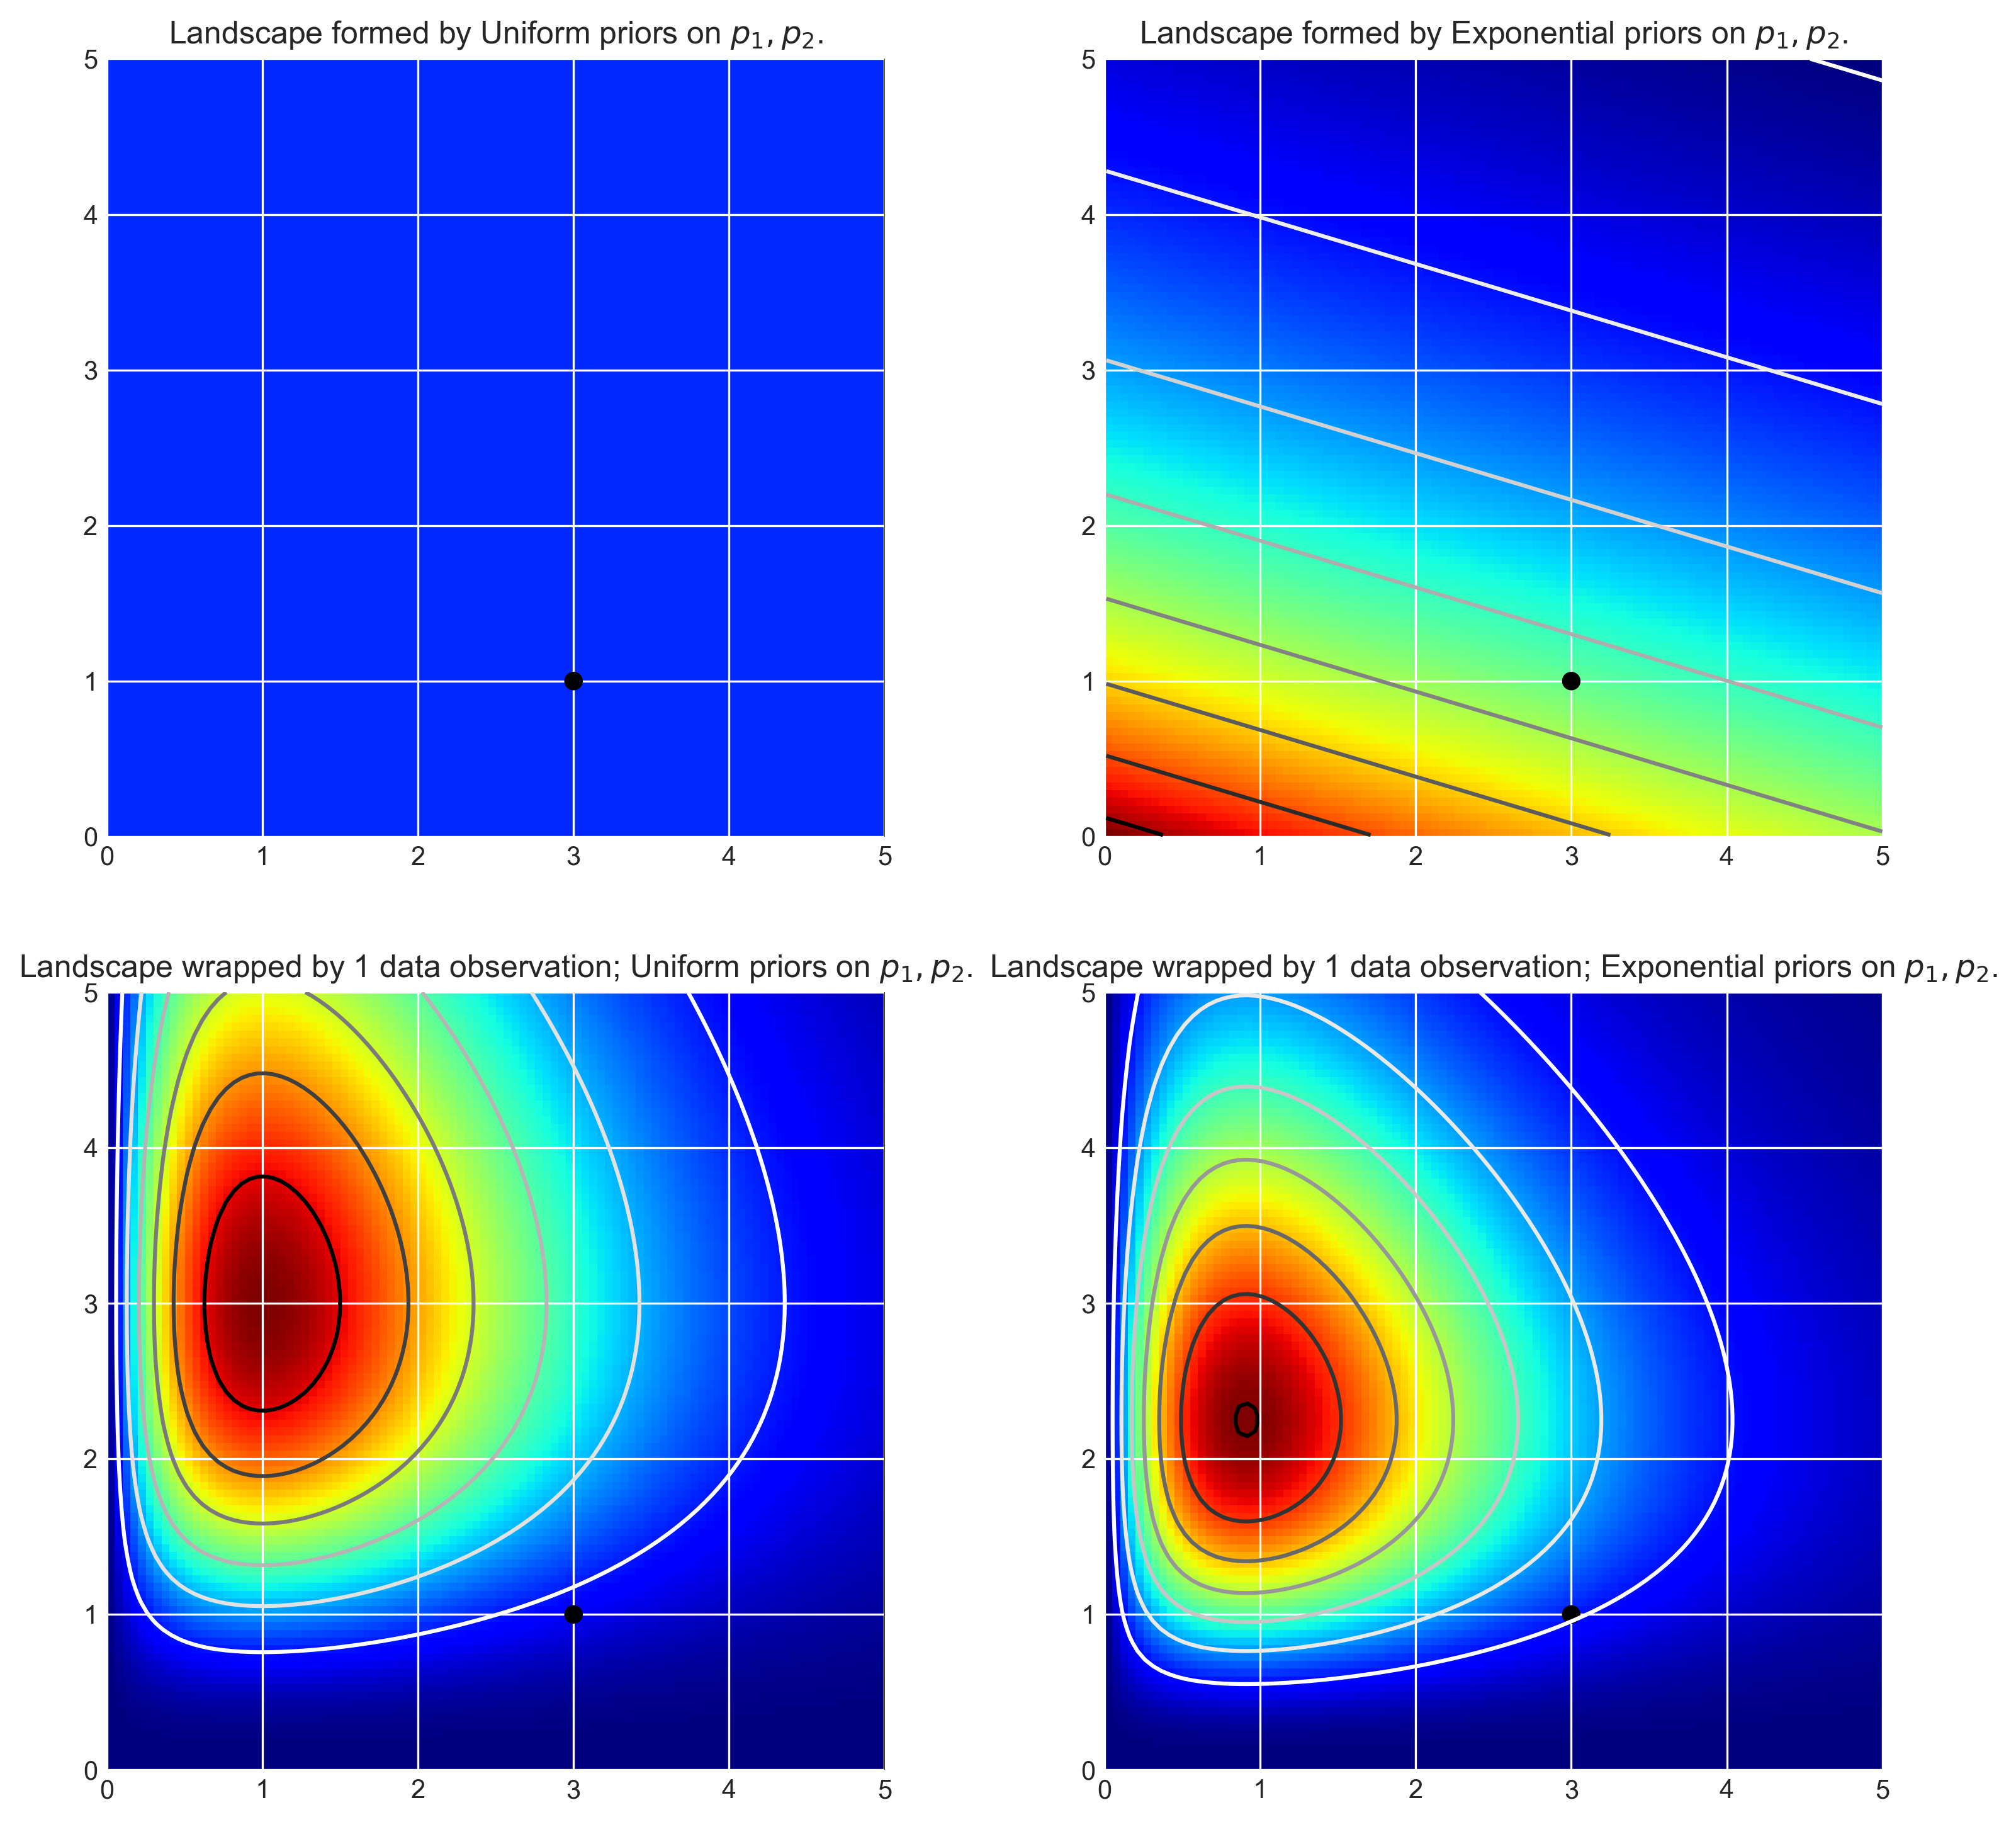

In [122]:
test(1)

- With 10 observed data.

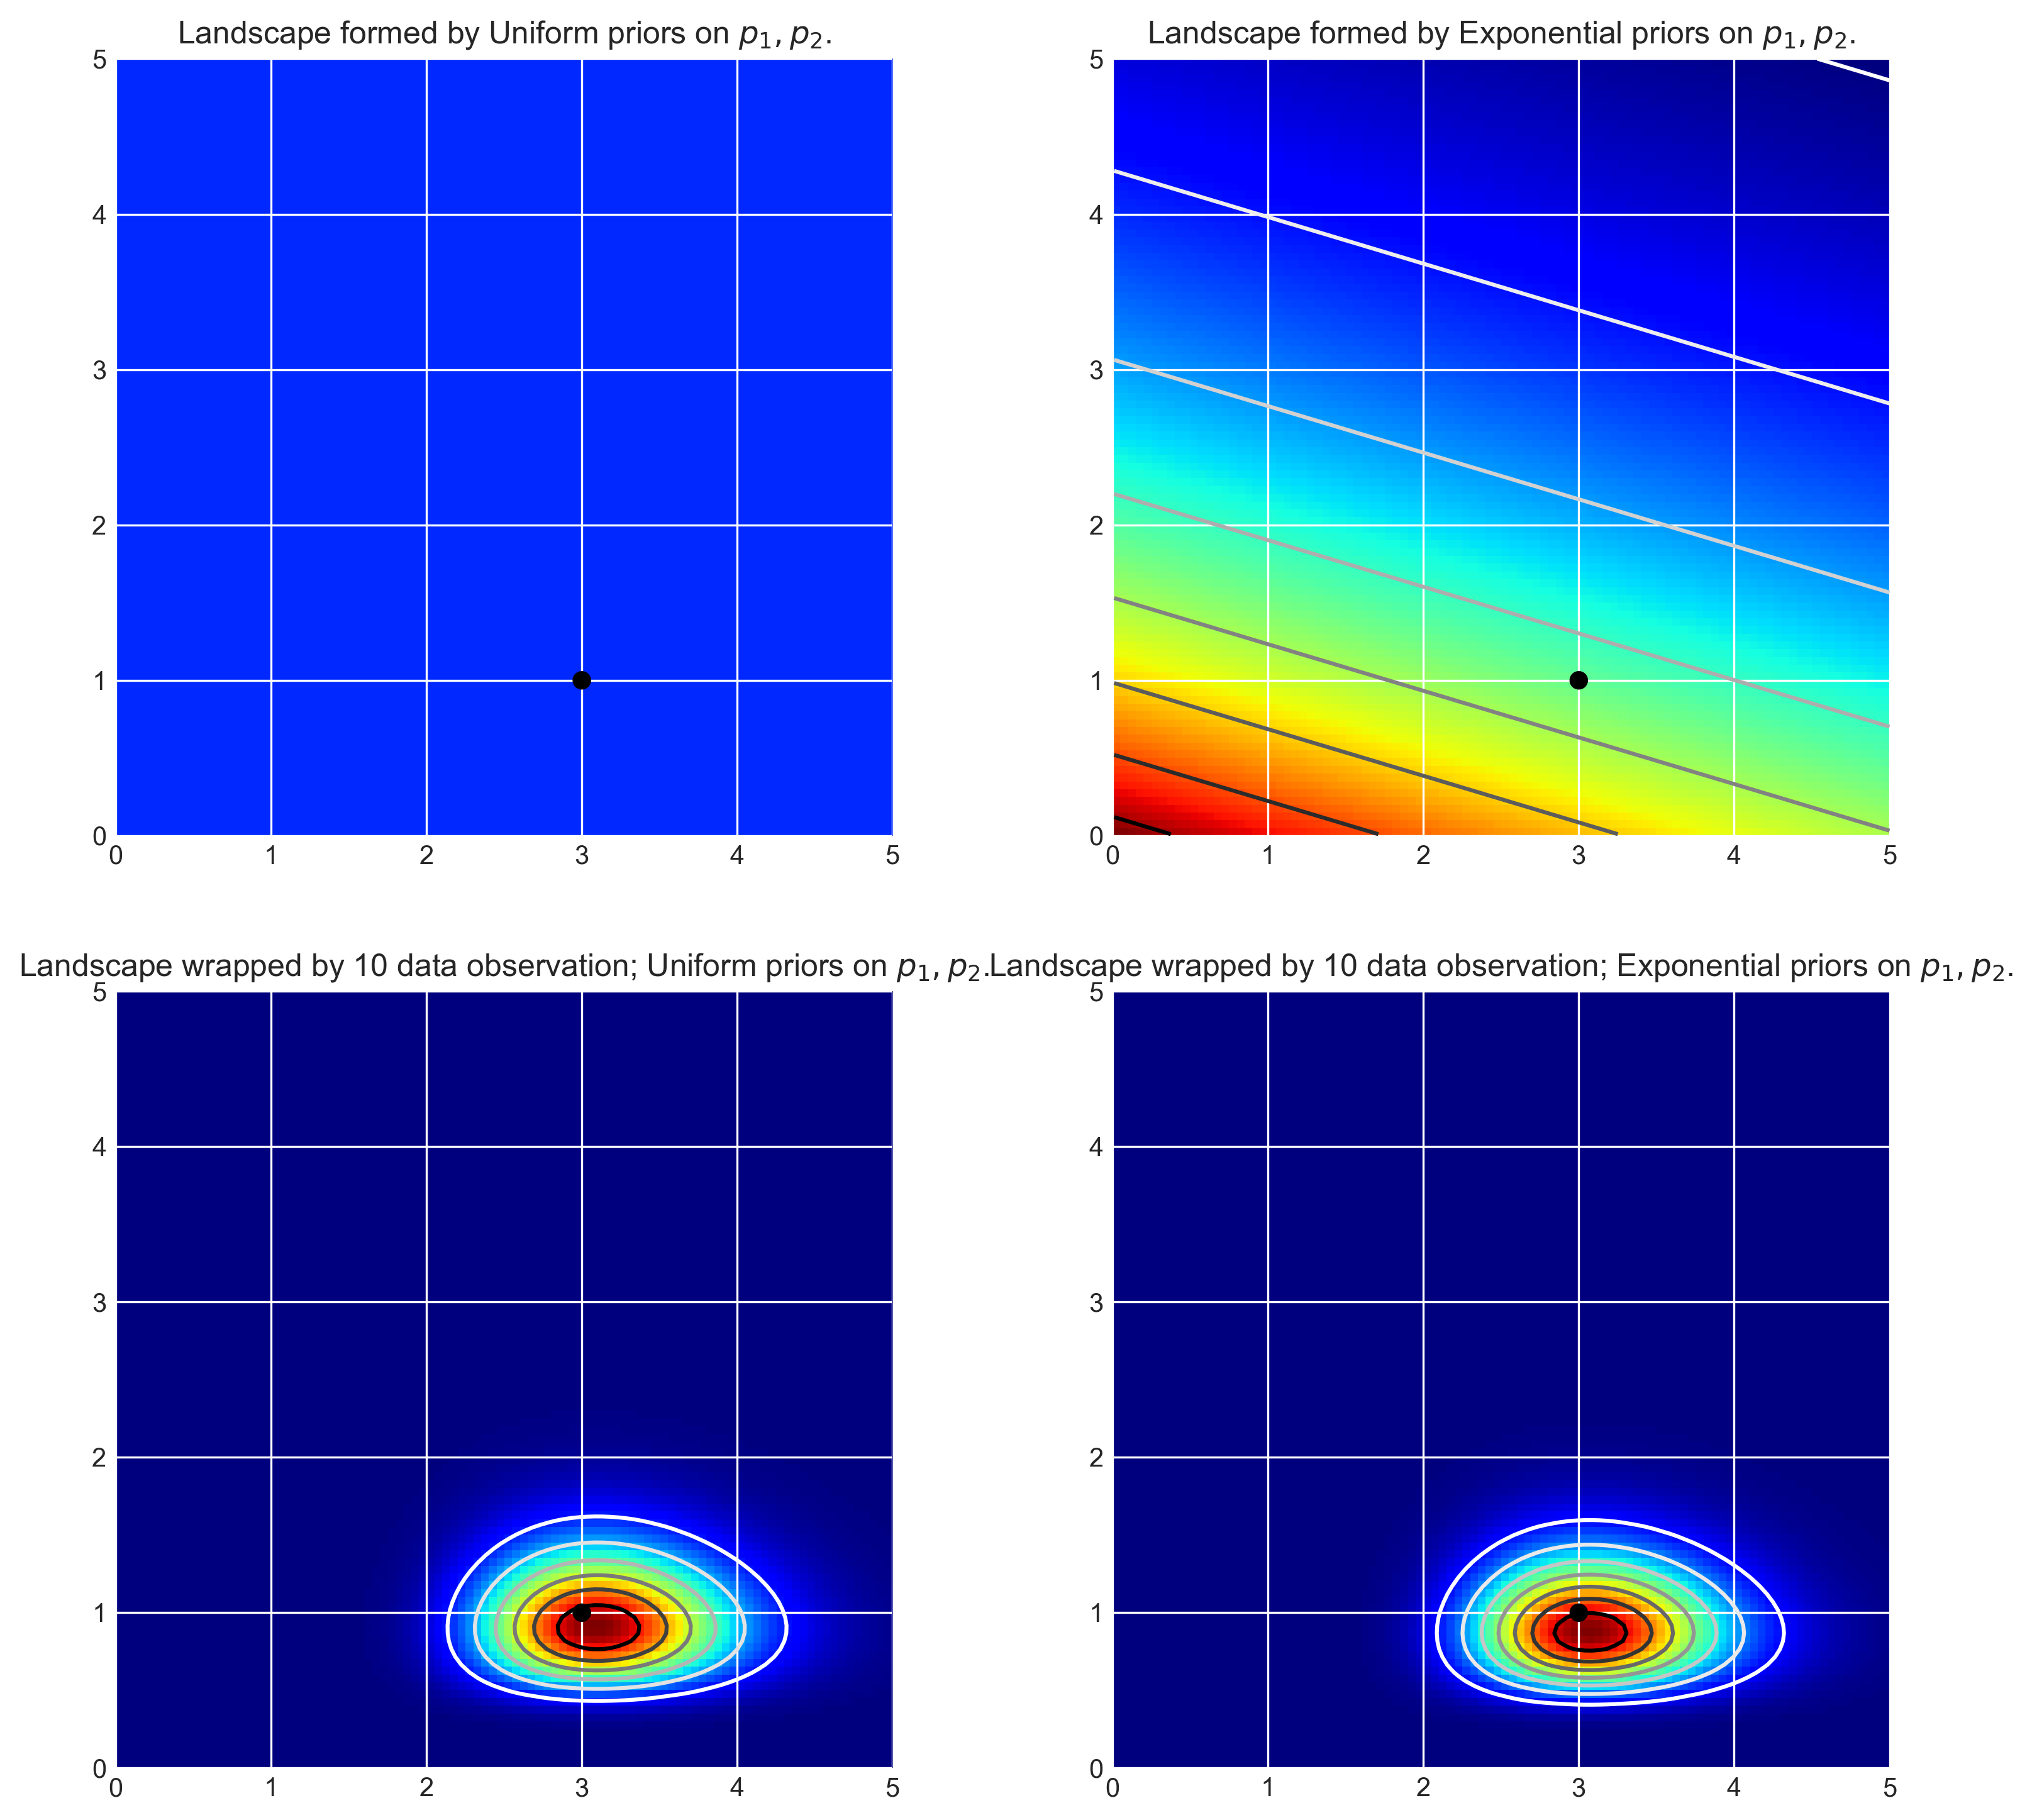

In [123]:
test(10)

- With 100 observed data.

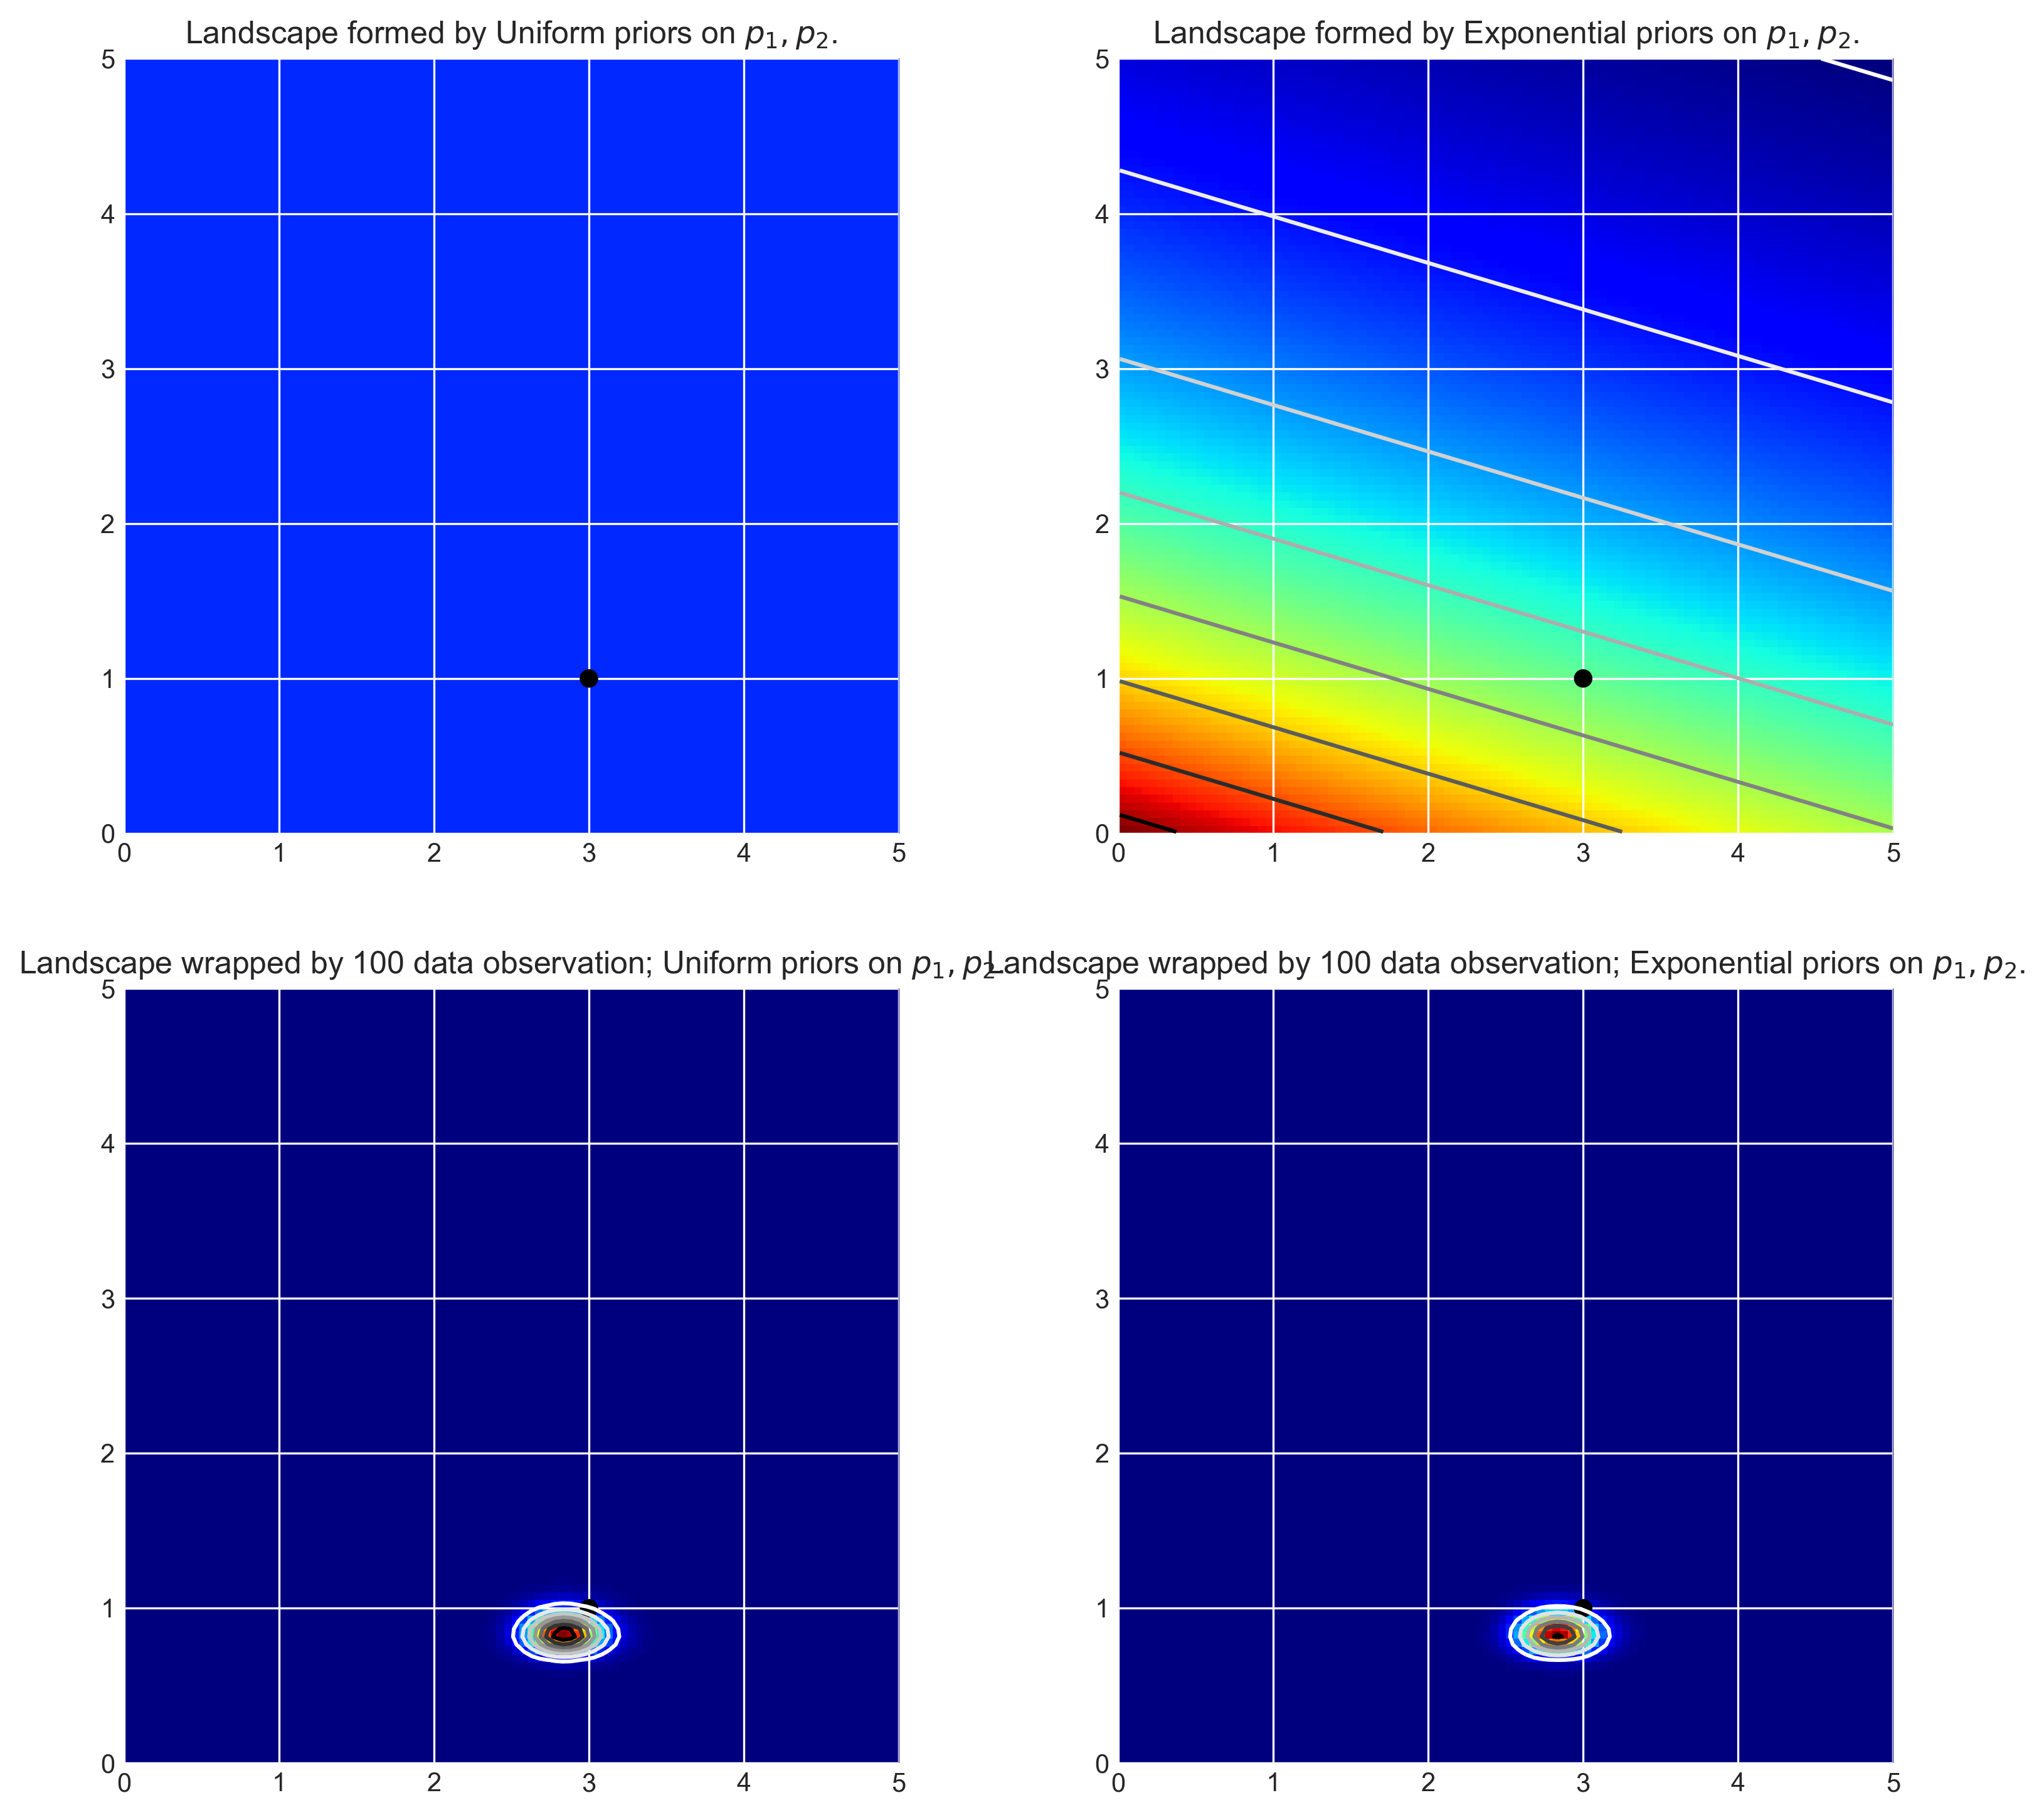

In [124]:
test(100)

- With 200 observed data.

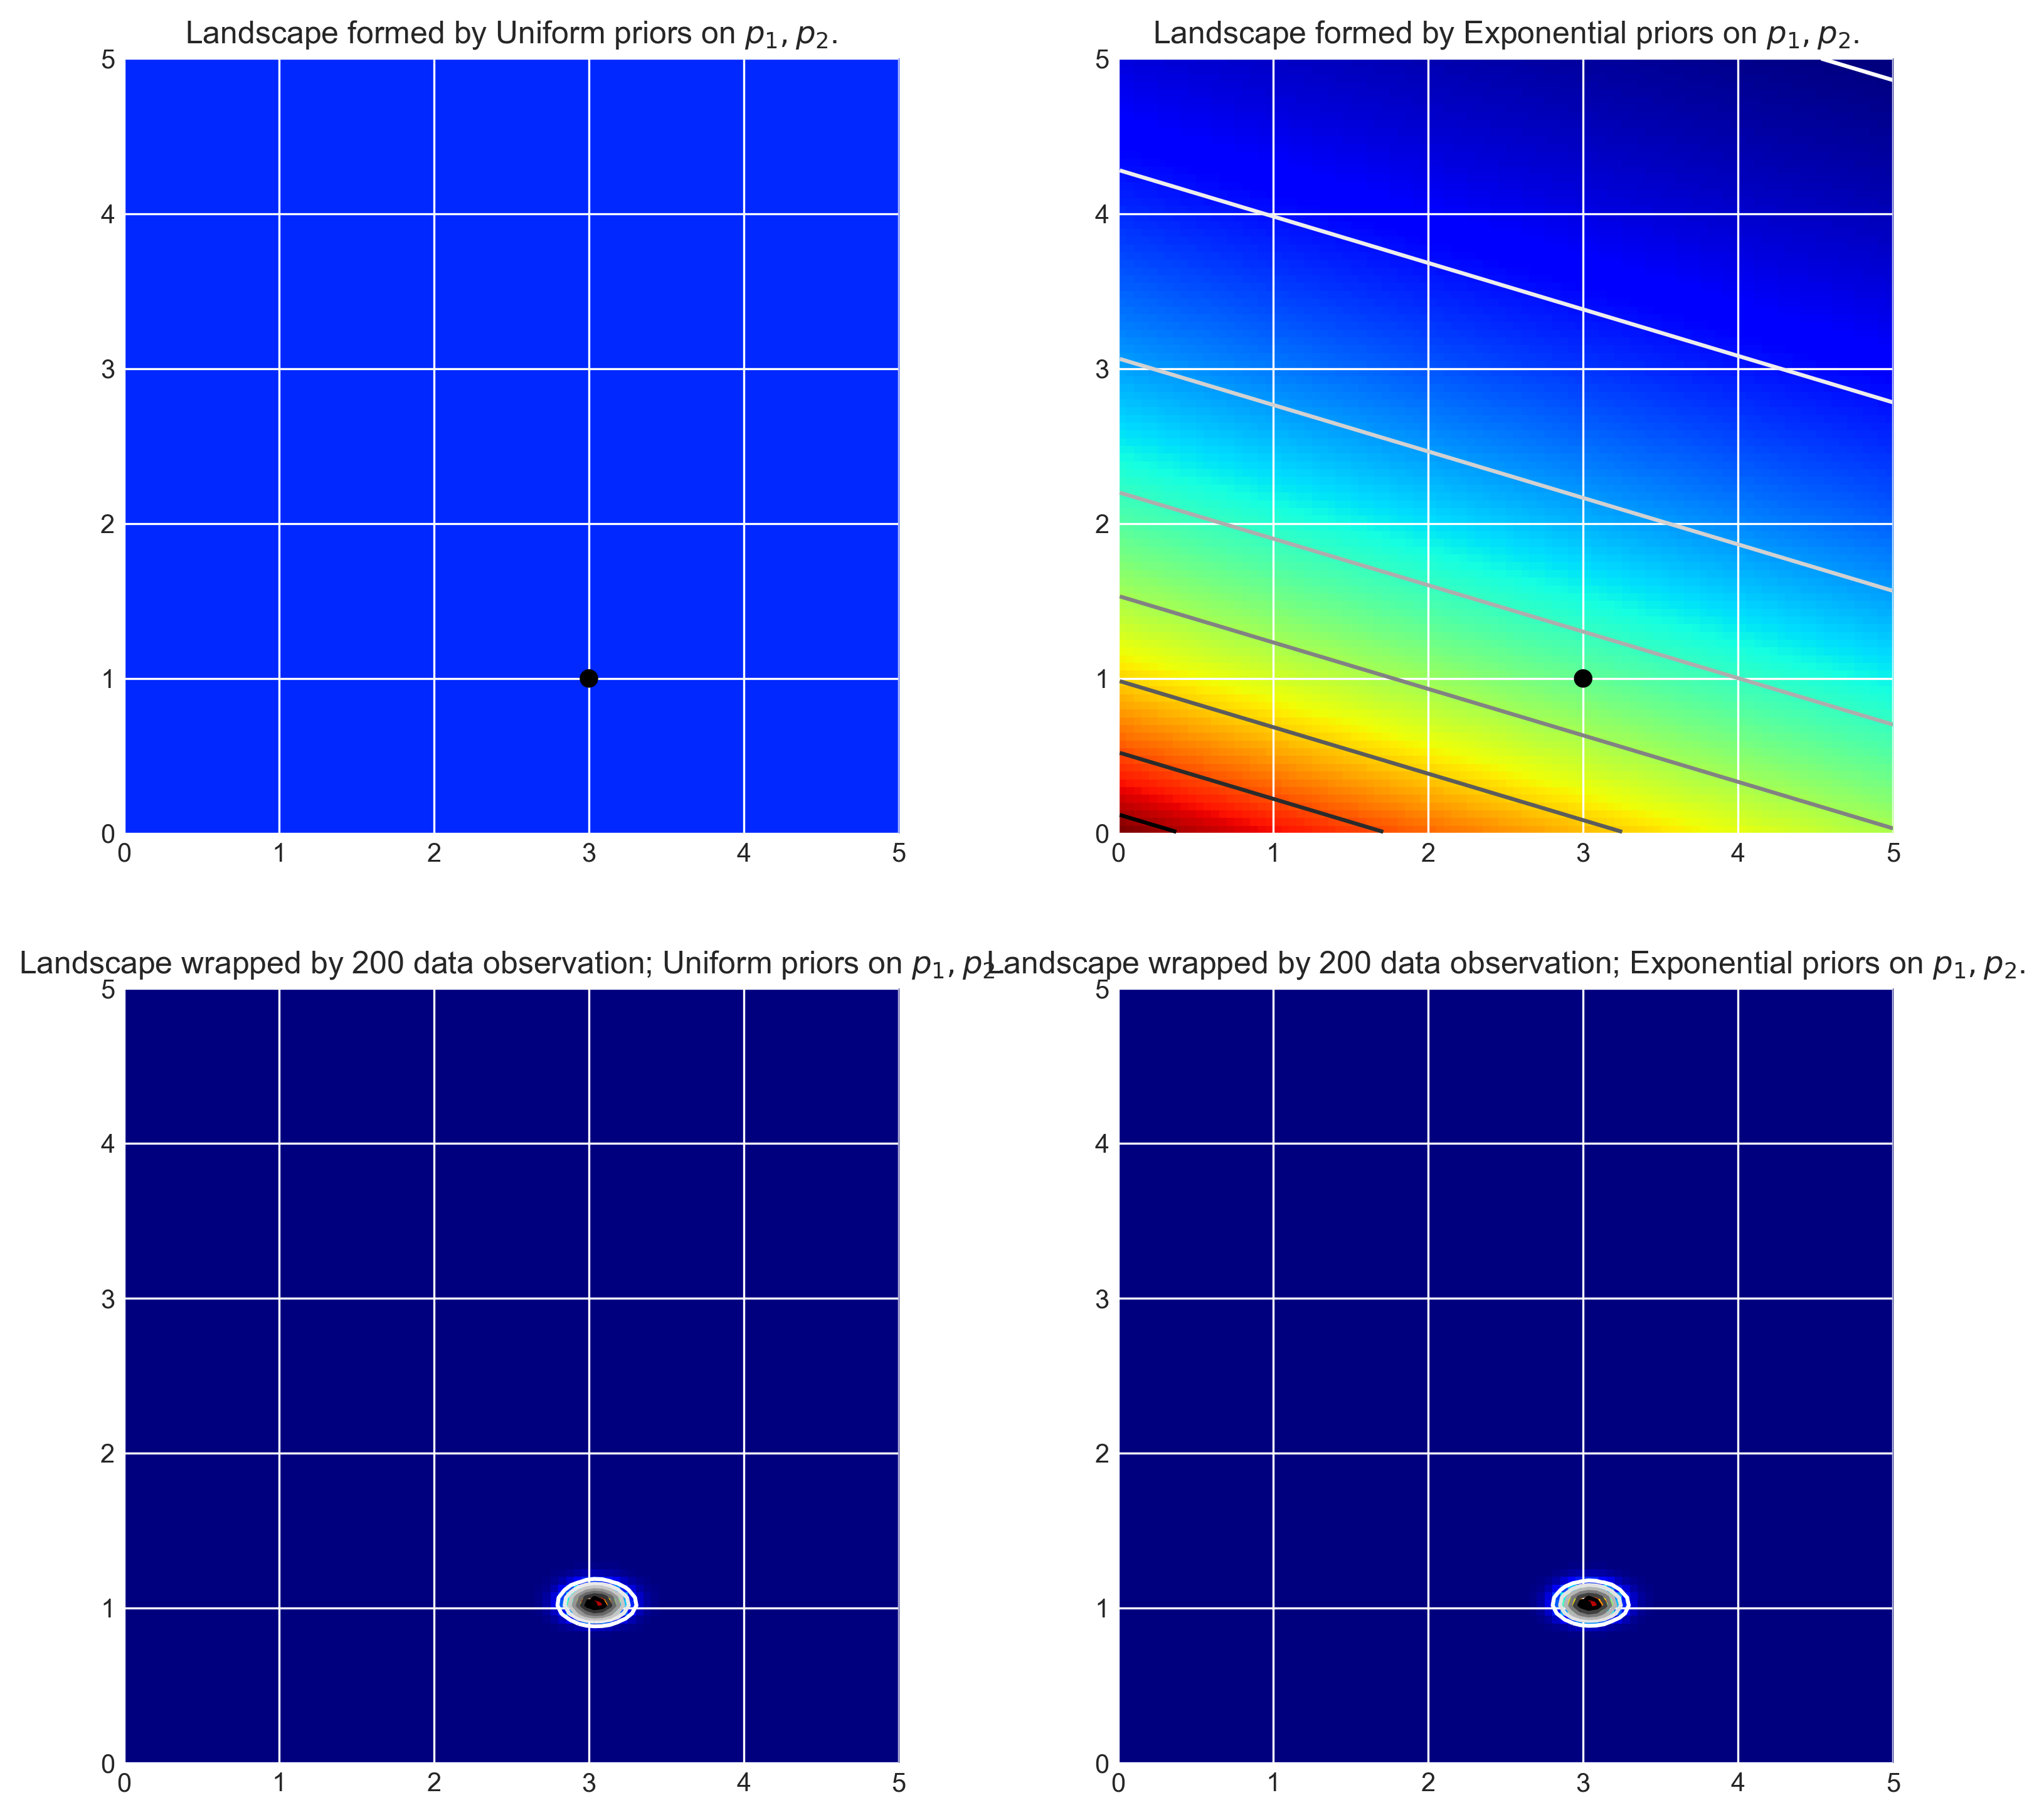

In [129]:
test(200)

- As a conclusion, the inference result converges to the true value and has less relationship with the prior distributions as the number of observed data gets bigger.

### Exploring the landscape using MCMC
- Unsupervised clustering using a mixture model

[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


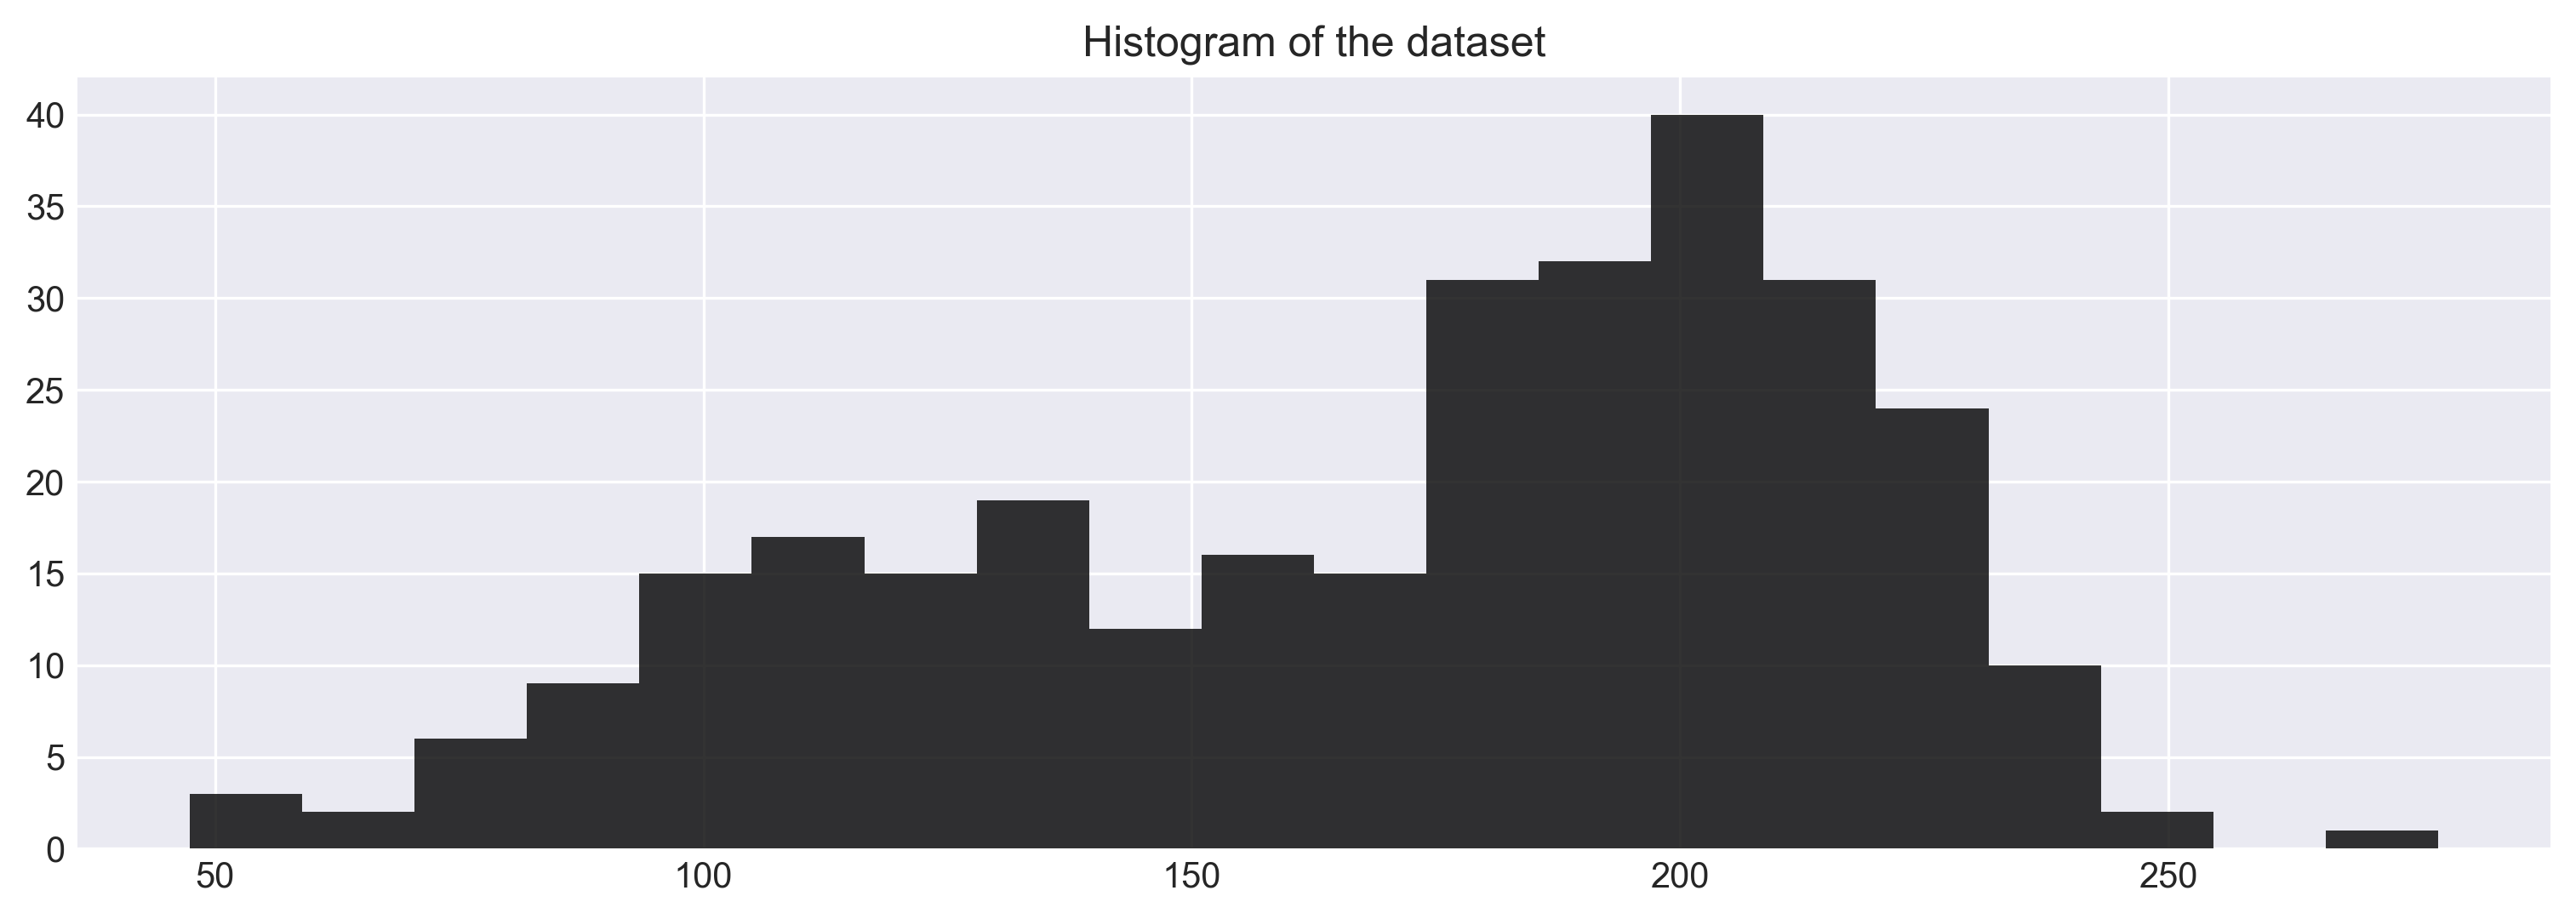

In [130]:
figsize(12.5, 4)

data = np.loadtxt('./data/mixture_data.csv', delimiter=',')
plt.hist(data, bins=20, color='k', histtype='stepfilled', alpha=0.8)
plt.title('Histogram of the dataset')
plt.ylim(0, None)
print(data[:10], '...')

- To infer the parameters of two normal distributions and p, I set the priors first.
- There are five priors in all: p, mu1, sd1, mu2, sd2

In [135]:
import pymc3 as pm
import theano.tensor as T

with pm.Model() as model:
    # define prior of p
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = T.stack([p1, p2])
    assignment = pm.Categorical('assignment', p, 
                                shape=data.shape[0], 
                                testval=np.random.randint(0, 2, data.shape[0]))
print('prior assignment p: {}'.format(p1.tag.test_value))
print(assignment.tag.test_value[:10])

prior assignment p: 0.5
[1 0 0 0 0 1 0 0 0 1]


In [139]:
with model:
    # define priors of sds and centers
    sds = pm.Uniform('sds', 0, 100, shape=2)
    centers = pm.Normal('centers', mu=np.array([120, 190]), sd=np.array([10, 10]), shape=2)
    
    # assign center and sd
    center_i = pm.Deterministic('center_i', centers[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    
    # combine with observations
    observations = pm.Normal('obs', mu=center_i, sd=sd_i, observed=data)
    
print('Random assignments: ', assignment.tag.test_value[:10])
print('Assigned centers: ', center_i.tag.test_value[:10])
print('Assigned standard deviations: ', sd_i.tag.test_value[:10])

Random assignments:  [1 0 0 0 0 1 0 0 0 1]
Assigned centers:  [ 190.  120.  120.  120.  120.  190.  120.  120.  120.  190.]
Assigned standard deviations:  [ 50.  50.  50.  50.  50.  50.  50.  50.  50.  50.]


- Sample from posterior distribution.

In [142]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, centers])
    step2 = pm.CategoricalGibbsMetropolis(vars=[assignment])
    trace = pm.sample(25000, step=[step1, step2])

Sampling 2 chains: 100%|██████████| 51000/51000 [14:57<00:00, 56.85draws/s]


(0, 1)

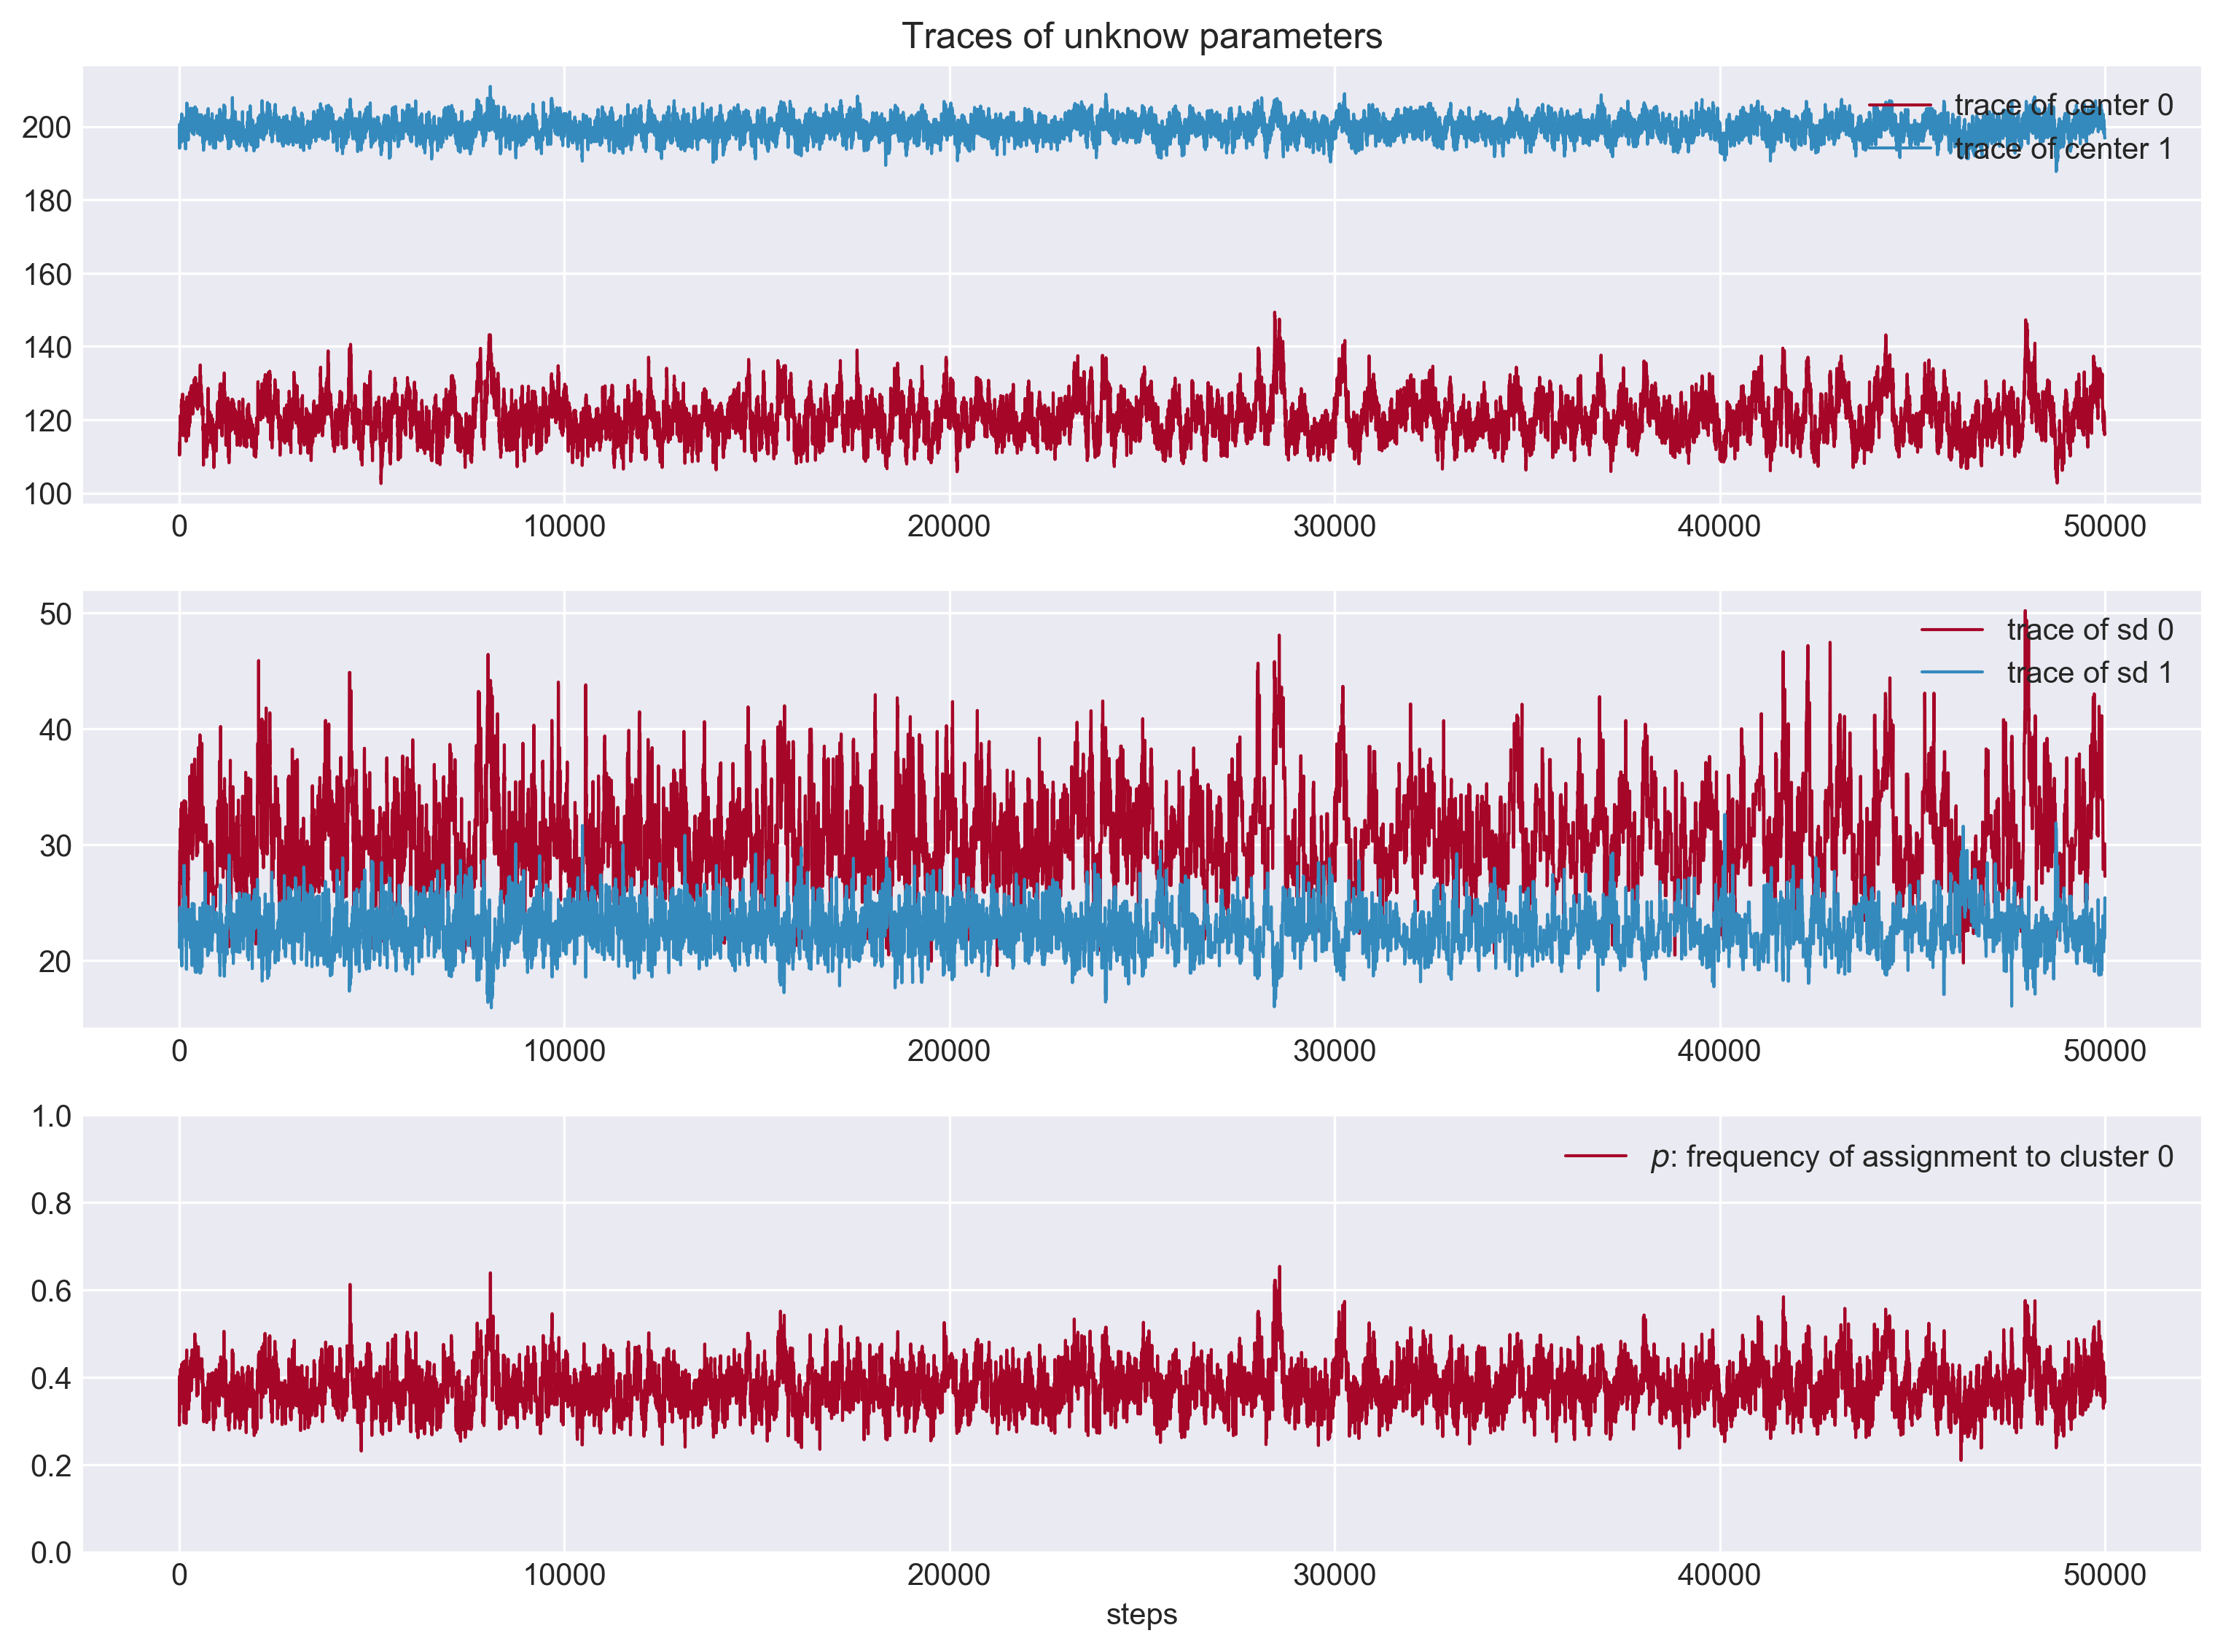

In [155]:
figsize(12.5, 9)

plt.subplot(311)
lw = 1
center_trace = trace['centers']

colors = ['#348ABD', '#A60628'] if center_trace[-1, 0] > center_trace[-1, 1] else [ '#A60628', '#348ABD']

plt.plot(center_trace[:, 0], label='trace of center 0', c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label='trace of center 1', c=colors[1], lw=lw)
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.5)
plt.title('Traces of unknow parameters')

plt.subplot(312)
plt.plot(trace['sds'][:, 0], label='trace of sd 0', c=colors[0], lw=lw)
plt.plot(trace['sds'][:, 1], label='trace of sd 1', c=colors[1], lw=lw)
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.5)

plt.subplot(313)
plt.plot(trace['p'], label='$p$: frequency of assignment to cluster 0', c=colors[0], lw=lw)
leg = plt.legend()
plt.xlabel('steps')
plt.ylim(0, 1)

- Sample more 25000 steps from where it left off.

In [156]:
with model:
    trace = pm.sample(25000, step=[step1, step2], trace=trace)

Sampling 2 chains: 100%|██████████| 51000/51000 [13:29<00:00, 63.03draws/s]


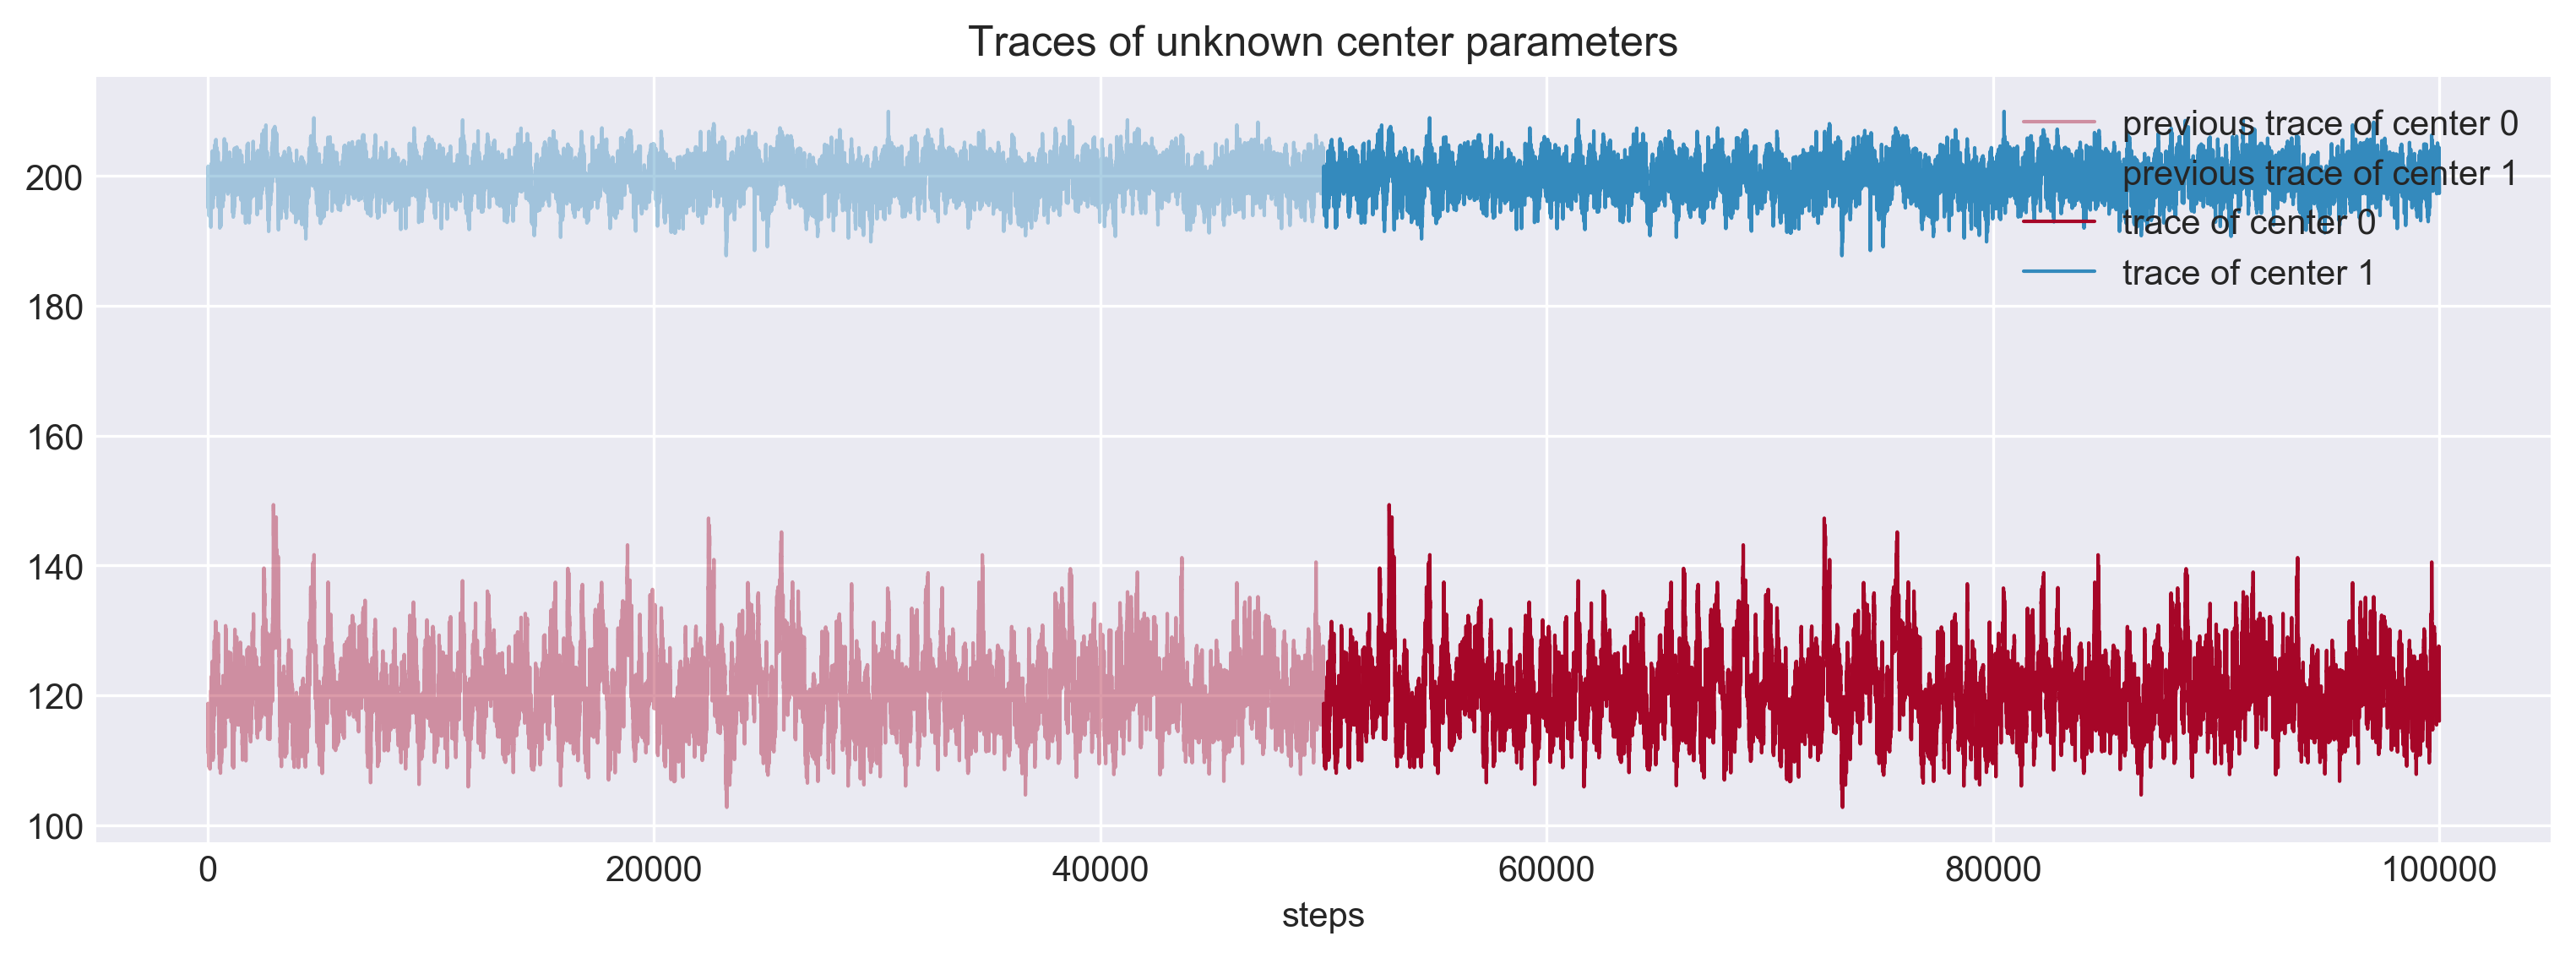

In [161]:
figsize(12.5, 4)
prev_center_trace = center_trace
center_trace = trace['centers'][50000:]

x = np.arange(50000)
plt.plot(x, prev_center_trace[:, 0], label='previous trace of center 0', lw=lw, alpha=0.4, c=colors[0])
plt.plot(x, prev_center_trace[:, 1], label='previous trace of center 1', lw=lw, alpha=0.4, c=colors[1])

x = np.arange(50000, 100000)
plt.plot(x, center_trace[:, 0], label='trace of center 0', lw=lw, c=colors[0])
plt.plot(x, center_trace[:, 1], label='trace of center 1', lw=lw,  c=colors[1])

plt.title('Traces of unknown center parameters')
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.8)
plt.xlabel('steps')

### Cluster investigation
- Plot posterior distributions of mu and sd.

In [165]:
figsize(12.5, 4)

std_trace = trace['sds'][50000:]
prev_std_trace = trace['sds'][:50000]

_i = [1, 2, 3, 4]
for i in range(2):
    
    plt.subplot(2, 2, _i[2 * i])
    plt.title('Posterior of center of cluster {}'.format(i))
    plt.hist(center_trace[:, i], bins=30, color=colors[i], histtype='stepfilled')
    

(100000, 2)